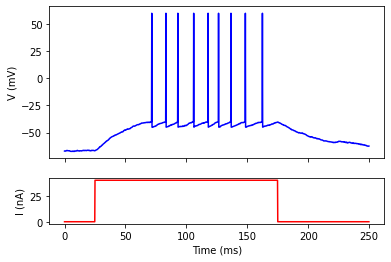

In [25]:
import numpy
import modules.IFNeurons as neu
import matplotlib.pyplot as plt

# simulation parameters
dt       = 0.2    # ms (time step)
T        = 250.0 # ms (total simulation time)

# membrane white noise amplitude
noiseStd = 0.5 # mV

# neuron parameters
VInit    = -67.0  # mV (initial condition of V)
Vr       = -45.0  # mV (reset potential)
Vb       = -67.0  # mV (baseline potential -- bias)
tau      =  38.0  # ms (membrane time constant)
R        =  1.0   # MOhm (external current channel
theta    = -40.0  # mV (threshold membrane potential)

# input current parameters
stimtype   = 'step' # 'step' == DC current; 'ramp' == linearly increasing current
I0         = 40.0   # nA (external current amplitude)
tStim      = 25.0  # ms (instant of stimulus start)
DeltaTStim = 150.0 # ms (duration of stimulus)

# create noise
noise = neu.SynapticWhiteNoise(noiseStd,dt)

# create neuron
neuron = neu.LIF(dt,VInit,Vr,Vb,tau,R,theta)

# add noise
neuron.AddNoiseFunc(noise.GetSignal)

# setup simulation output variables
Tsteps = int(numpy.ceil(T / dt))
ts     = numpy.arange(Tsteps)
V      = numpy.zeros(Tsteps)

# creating input current
I      = neu.get_input_current(ts,dt,stimtype,I0,tStim,DeltaTStim)

# time loop
for t in ts:
    # integrate neuron equation subject to external current I[t]
    neuron.Step(I[t])

    # save membrane potential at time t
    V[t] = neuron.GetV()


fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,height_ratios=[1,0.3])
ax[0].plot(ts*dt,V,'-b')
ax[1].plot(ts*dt,I,'-r')
ax[0].set_ylabel('V (mV)')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('I (nA)')

plt.show()

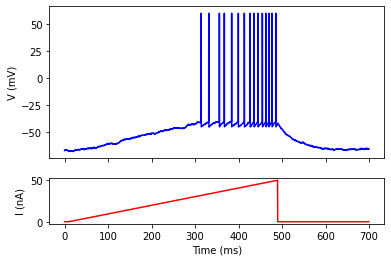

In [29]:
import numpy
import modules.IFNeurons as neu
import matplotlib.pyplot as plt

# simulation parameters
dt       = 0.2    # ms (time step)
T        = 700.0 # ms (total simulation time)

# membrane white noise amplitude
noiseStd = 0.5 # mV

# neuron parameters
VInit    = -67.0  # mV (initial condition of V)
Vr       = -45.0  # mV (reset potential)
Vb       = -67.0  # mV (baseline potential -- bias)
tau      =  38.0  # ms (membrane time constant)
R        =  1.0   # MOhm (external current channel
theta    = -40.0  # mV (threshold membrane potential)

# input current parameters
stimtype   = 'ramp' # 'step' == DC current; 'ramp' == linearly increasing current
I0         = 50.0   # nA (external current amplitude)
tStim      = 10.0  # ms (instant of stimulus start)
DeltaTStim = 480.0 # ms (duration of stimulus)

# create noise
noise = neu.SynapticWhiteNoise(noiseStd,dt)

# create neuron
neuron = neu.LIF(dt,VInit,Vr,Vb,tau,R,theta)

# add noise
neuron.AddNoiseFunc(noise.GetSignal)

# setup simulation output variables
Tsteps = int(numpy.ceil(T / dt))
ts     = numpy.arange(Tsteps)
V      = numpy.zeros(Tsteps)

# creating input current
I      = neu.get_input_current(ts,dt,stimtype,I0,tStim,DeltaTStim)

# time loop
for t in ts:
    # integrate neuron equation subject to external current I[t]
    neuron.Step(I[t])

    # save membrane potential at time t
    V[t] = neuron.GetV()


fig,ax = plt.subplots(nrows=2,ncols=1,sharex=True,height_ratios=[1,0.3])
ax[0].plot(ts*dt,V,'-b')
ax[1].plot(ts*dt,I,'-r')
ax[0].set_ylabel('V (mV)')
ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('I (nA)')

plt.show()